# Задача D-optimal design 

### Целевая функция

Эксперименты проводились на функции D-optimal design на единичном симплексе:
$$
\begin{array}{ll}
\textrm{minimize}   & F(x):=\log\left(\det\left(\sum_{i=1}^n x_i V_i V_i^T\right)\right) \\
\textrm{subject to} & \sum_{i=1}^n x_i = 1, \\ 
                    & x_i\geq 0, \quad i=1,\ldots,n
\end{array}
$$
где $V_i\in R^m$ for $i=1,\ldots,n$.

Относительная-гладкость бралась с прокс-функцией Бёрга с $\gamma < 1$ и $L=1$ (см. статью Hanzley)
$$
h(x) = - \sum_{i=1}^{n} \log(x^{(i)})
$$
on $\mathbb{R}_+^n$. 

### Данные 
Эксперименты проводились на следующих данных:
- случайно сгенерированные данные
- реальные датасеты abalone (n = 4177; m = 8), bodyfat, (n = 252; m = 14), mpg (n = 392; m = 7) and housing (n = 506; m = 13)

Начальная точка бралась случайно из единичного симплекса.

### Алгоритмы
В экспериментах сравниваются следующие методы:
- Алгоритм Франк-Вульфа с адаптивными параметрами $L$ и $\gamma$ (FW-adapt-full)
- Алгоритм Франк-Вульфа с адаптивным параметром $L$ и фиксированным $\gamma$ (FW-adapt-L)
- Алгоритм Франк-Вульфа с фиксированными параметрами $L$ и $\gamma$ (FW-Bregman)
- Алгоритм Франк-Вульфа с убывающим шагом $\frac{2}{k + 1}$. Алгоритм не зависит ни от каких параметров (FW-Descent Step)

### Цель эксперимента

Ответим на вопросы
1) Дает ли выигрыш в скорости сходимость адаптивность не только по $L$, но и по $\gamma$?
2) На сколько быстры алгоритмы, которые не зависят от параметров, такие как алгоритм FW с убывающим шагом (FW-Descent Step), алгоритм FW с адаптивными параметрами $L$ и $\gamma$ (FW-adapt-full)?
3) Изначальная гипотеза, что $\gamma$ лучше менять пореже, поэтому проверить, что как отразится на производительности алгоритма, если менять $\gamma$ каждые 2, 10, 50, 100 итераций?

In [1]:
import sys
import os

# Get the parent directory of the notebook (2 levels up)
notebook_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)

In [2]:
from matplotlib.ticker import ScalarFormatter
import numpy as np
import matplotlib.pyplot as plt

import accbpg
from accbpg.utils import random_point_on_simplex

## Случайно сгенерированные данные, $m$ фиксирована

Данные генерируются случайно из нормального распределения с матожиданием 0, дисперсией 1.
- случайно сгенерированные данные (m = 80 and n = 200)
- случайно сгенерированные данные (m = 80 and n = 400)
- случайно сгенерированные данные (m = 80 and n = 1000)

<>:45: SyntaxWarning: invalid escape sequence '\ '
<>:45: SyntaxWarning: invalid escape sequence '\ '
C:\Users\alexa\AppData\Local\Temp\ipykernel_23796\4290588221.py:45: SyntaxWarning: invalid escape sequence '\ '
  axes[i, 0].set_title(f"$m = {m},\ n = {n}$")



FW full adaptive algorithm
     k      F(x)         Lk       time       gamma
     0   3.196e+01   1.000e+00     0.0   2.000e+00
   500   1.777e+01   1.250e-01     0.4   1.952e+00
  1000   1.736e+01   1.250e-01     0.8   1.952e+00
  1500   1.718e+01   1.250e-01     1.1   2.000e+00
  2000   1.710e+01   1.250e-01     1.4   2.000e+00
  2500   1.705e+01   1.250e-01     1.7   2.000e+00
  3000   1.703e+01   1.250e-01     2.0   2.000e+00
  3500   1.701e+01   1.250e-01     2.3   2.000e+00
  4000   1.700e+01   1.250e-01     2.6   2.000e+00
  4500   1.699e+01   1.250e-01     3.0   2.000e+00

FW adaptive algorithm
     k      F(x)         Lk       time
     0   3.196e+01   1.000e+00     0.0
   500   1.809e+01   2.500e-01     0.3
  1000   1.757e+01   2.500e-01     0.6
  1500   1.733e+01   1.250e-01     0.9
  2000   1.716e+01   1.250e-01     1.3
  2500   1.709e+01   1.250e-01     1.6
  3000   1.705e+01   1.250e-01     2.0
  3500   1.703e+01   1.250e-01     2.3
  4000   1.701e+01   1.250e-01     2.

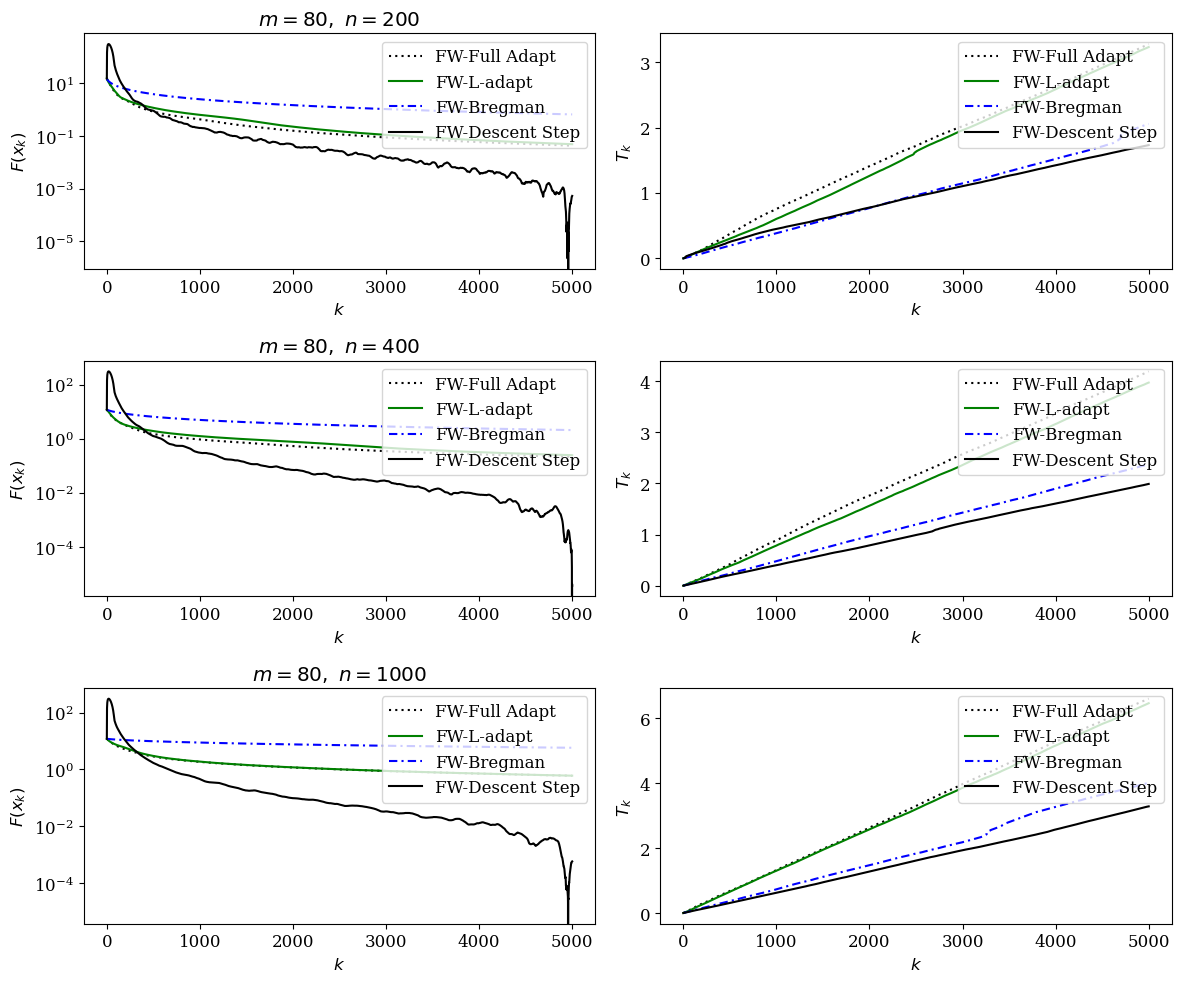

In [12]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 3 rows, 2 cols

max_iters = 5000
verbskip = 500
ls_ratio = 2.0
theta = 1.05
gamma = 2.0
configs = [(80, 200), (80, 400), (80, 1000)]

np.random.seed(2025)

labels = [r"FW-Full Adapt", r"FW-L-adapt", r"FW-Bregman", r"FW-Descent Step"]

for i, (m, n) in enumerate(configs):
    f, h, L, _ = accbpg.D_opt_design(m, n)
    x0 = random_point_on_simplex(n)
    lmo = accbpg.lmo_simplex()

    _, F00_full_adapt, _, T_full_adapt, _ = accbpg.FW_alg_div_step_adapt(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        ls_ratio=ls_ratio, divisor_for_tse=theta, verbskip=verbskip
    )
    _, F00_L_adapt, _, T_adapt = accbpg.FW_alg_div_step(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        linesearch=True, ls_ratio=ls_ratio, verbskip=verbskip
    )
    _, F00_bregman, _, T_bregman = accbpg.FW_alg_div_step(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        linesearch=False, verbskip=verbskip
    )
    _, F00_descent_step, T_descent_step, _ = accbpg.FW_alg_descent_step(
        f, h, x0, maxitrs=max_iters, lmo=lmo, verbskip=verbskip
    )

    # Plot F(x_k)
    accbpg.plot_comparisons(
        axes[i, 0],
        [F00_full_adapt, F00_L_adapt, F00_bregman, F00_descent_step],
        labels,
        x_vals=[], plotdiff=True, yscale="log",
        xlabel=r"$k$", ylabel=r"$F(x_k)$",
        legendloc="upper right"
    )
    axes[i, 0].set_title(f"$m = {m},\ n = {n}$")

    # Plot T_k
    accbpg.plot_comparisons(
        axes[i, 1],
        [T_full_adapt, T_adapt, T_bregman, T_descent_step],
        labels,
        x_vals=[], plotdiff=True, yscale="linear",
        xlabel=r"$k$", ylabel=r"$T_k$",
        legendloc="upper right"
    )

    
plt.tight_layout()

## Случайно сгенерированные данные, $n$ фиксирована

Данные генерируются случайно из нормального распределения с матожиданием 0, дисперсией 1.
- случайно сгенерированные данные (m = 80 and n = 200)
- случайно сгенерированные данные (m = 110 and n = 200)
- случайно сгенерированные данные (m = 160 and n = 200)

<>:39: SyntaxWarning: invalid escape sequence '\ '
<>:39: SyntaxWarning: invalid escape sequence '\ '
C:\Users\alexa\AppData\Local\Temp\ipykernel_23796\1800087597.py:39: SyntaxWarning: invalid escape sequence '\ '
  axes[0].set_title(f"$m = {m},\ n = {n}$")



FW full adaptive algorithm
     k      F(x)         Lk       time       gamma
     0   3.196e+01   1.000e+00     0.0   2.000e+00
   500   1.777e+01   1.250e-01     0.4   1.952e+00
  1000   1.736e+01   1.250e-01     0.8   1.952e+00
  1500   1.718e+01   1.250e-01     1.1   2.000e+00
  2000   1.710e+01   1.250e-01     1.5   2.000e+00
  2500   1.705e+01   1.250e-01     1.8   2.000e+00
  3000   1.703e+01   1.250e-01     2.1   2.000e+00
  3500   1.701e+01   1.250e-01     2.5   2.000e+00
  4000   1.700e+01   1.250e-01     2.8   2.000e+00
  4500   1.699e+01   1.250e-01     3.2   2.000e+00

FW full adaptive algorithm
     k      F(x)         Lk       time       gamma
     0   3.196e+01   1.000e+00     0.0   2.000e+00
   500   1.809e+01   2.500e-01     0.3   2.000e+00
  1000   1.757e+01   2.500e-01     0.7   2.000e+00
  1500   1.733e+01   1.250e-01     1.0   2.000e+00
  2000   1.716e+01   1.250e-01     1.4   2.000e+00
  2500   1.709e+01   1.250e-01     1.7   2.000e+00
  3000   1.705e+01   1.250

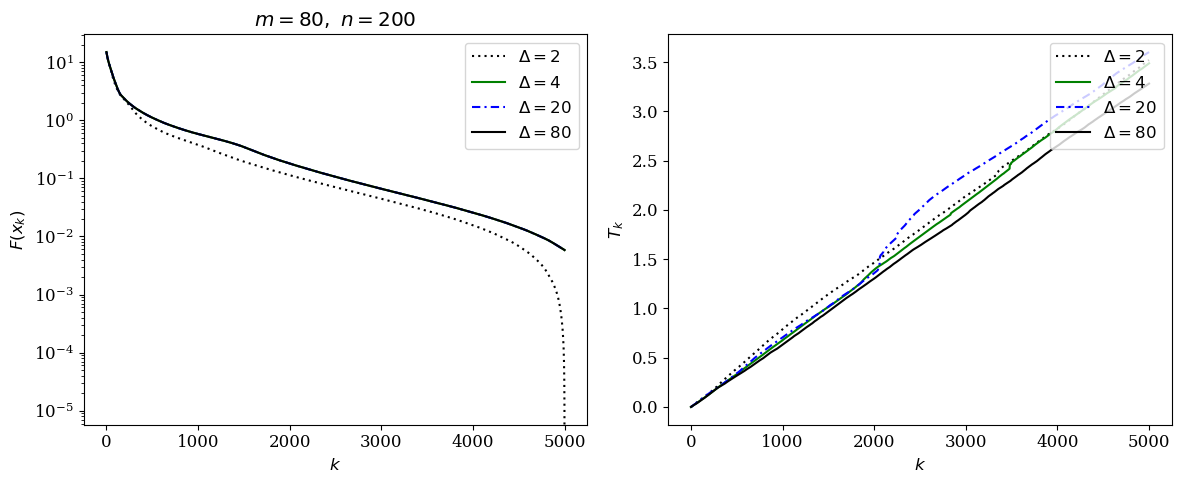

In [22]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

max_iters = 5000
verbskip = 500
ls_ratio = 2.0
theta = 1.05
gamma = 2.0
m, n = 80, 200
change_tse_values = [2, 4, 20, 80]  # Logarithmic steps

np.random.seed(2025)

labels = [rf"$\Delta={val}$" for val in change_tse_values]

f, h, L, _ = accbpg.D_opt_design(m, n)
x0 = random_point_on_simplex(n)
lmo = accbpg.lmo_simplex()

F00_full_adapt_list = []
T_full_adapt_list = []

for change_tse_each_n in change_tse_values:
    _, F00_full_adapt, _, T_full_adapt, _ = accbpg.FW_alg_div_step_adapt(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        change_tse_each_n=change_tse_each_n,
        ls_ratio=ls_ratio, divisor_for_tse=theta, verbskip=verbskip
    )
    F00_full_adapt_list.append(F00_full_adapt)
    T_full_adapt_list.append(T_full_adapt)

# Plot F(x_k)
accbpg.plot_comparisons(
    axes[0], F00_full_adapt_list, labels,
    x_vals=[], plotdiff=True, yscale="log",
    xlabel=r"$k$", ylabel=r"$F(x_k)$",
    legendloc="upper right"
)
axes[0].set_title(f"$m = {m},\ n = {n}$")

# Plot T_k
accbpg.plot_comparisons(
    axes[1], T_full_adapt_list, labels,
    x_vals=[], plotdiff=True, yscale="linear",
    xlabel=r"$k$", ylabel=r"$T_k$",
    legendloc="upper right"
)

plt.tight_layout()

## Изменение частоты изменения параметра $\gamma$

In [ ]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 cols

max_iters = 3000
verbskip = 500
ls_ratio = 2.0
theta = 1.05
gamma = 2.0
m, n = 80, 200
change_tse_values = [2, 4, 20, 80]

np.random.seed(2025)
labels = [rf"$\Delta={val}$" for val in change_tse_values]

f, h, L, _ = accbpg.D_opt_design(m, n)
x0 = random_point_on_simplex(n)
lmo = accbpg.lmo_simplex()

F_all, T_all = [], []

for change_tse_each_n in change_tse_values:
    _, F_vals, _, T_vals, _ = accbpg.FW_alg_div_step_adapt(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        change_tse_each_n=change_tse_each_n,
        ls_ratio=ls_ratio, divisor_for_tse=theta, verbskip=verbskip
    )
    F_all.append(F_vals)
    T_all.append(T_vals)

# Plot F(x_k)
accbpg.plot_comparisons(
    axes[0, 0], F_all, labels,
    x_vals=[], plotdiff=True, yscale="log",
    xlabel=r"$k$", ylabel=r"$F(x_k)$",
    legendloc="upper right"
)
axes[0, 0].set_title(f"$m = {m},\ n = {n}$")

# Plot T_k
accbpg.plot_comparisons(
    axes[0, 1], T_all, labels,
    x_vals=[], plotdiff=True, yscale="linear",
    xlabel=r"$k$", ylabel=r"$T_k$",
    legendloc="upper right"
)

plt.tight_layout()

## Эксперименты на реальных датасетах

Тут взяты реальные датасеты abalone (n = 4177; m = 8), bodyfat, (n = 252; m = 14), mpg (n = 392; m = 7) and housing (n = 506; m = 13), которые применялись в статье Hanzley

In [5]:
import os


FW full adaptive algorithm
     k      F(x)         Lk       time       gamma
     0  -3.475e+01   5.000e-01     0.0   2.000e+00
   500  -4.570e+01   3.906e-03     0.1   2.000e+00
  1000  -4.583e+01   3.906e-03     0.2   2.000e+00
  1500  -4.588e+01   3.906e-03     0.3   2.000e+00
  2000  -4.590e+01   3.906e-03     0.4   2.000e+00
  2500  -4.592e+01   3.906e-03     0.5   2.000e+00
  3000  -4.593e+01   3.906e-03     0.7   2.000e+00
  3500  -4.594e+01   3.906e-03     0.8   2.000e+00
  4000  -4.594e+01   3.906e-03     0.9   2.000e+00
  4500  -4.595e+01   3.906e-03     1.0   2.000e+00

FW adaptive algorithm
     k      F(x)         Lk       time
     0  -3.475e+01   5.000e-01     0.0
   500  -4.569e+01   3.906e-03     0.1
  1000  -4.583e+01   3.906e-03     0.2
  1500  -4.588e+01   3.906e-03     0.3
  2000  -4.590e+01   3.906e-03     0.4
  2500  -4.592e+01   3.906e-03     0.5
  3000  -4.593e+01   3.906e-03     0.6
  3500  -4.594e+01   3.906e-03     0.7
  4000  -4.594e+01   3.906e-03     0.

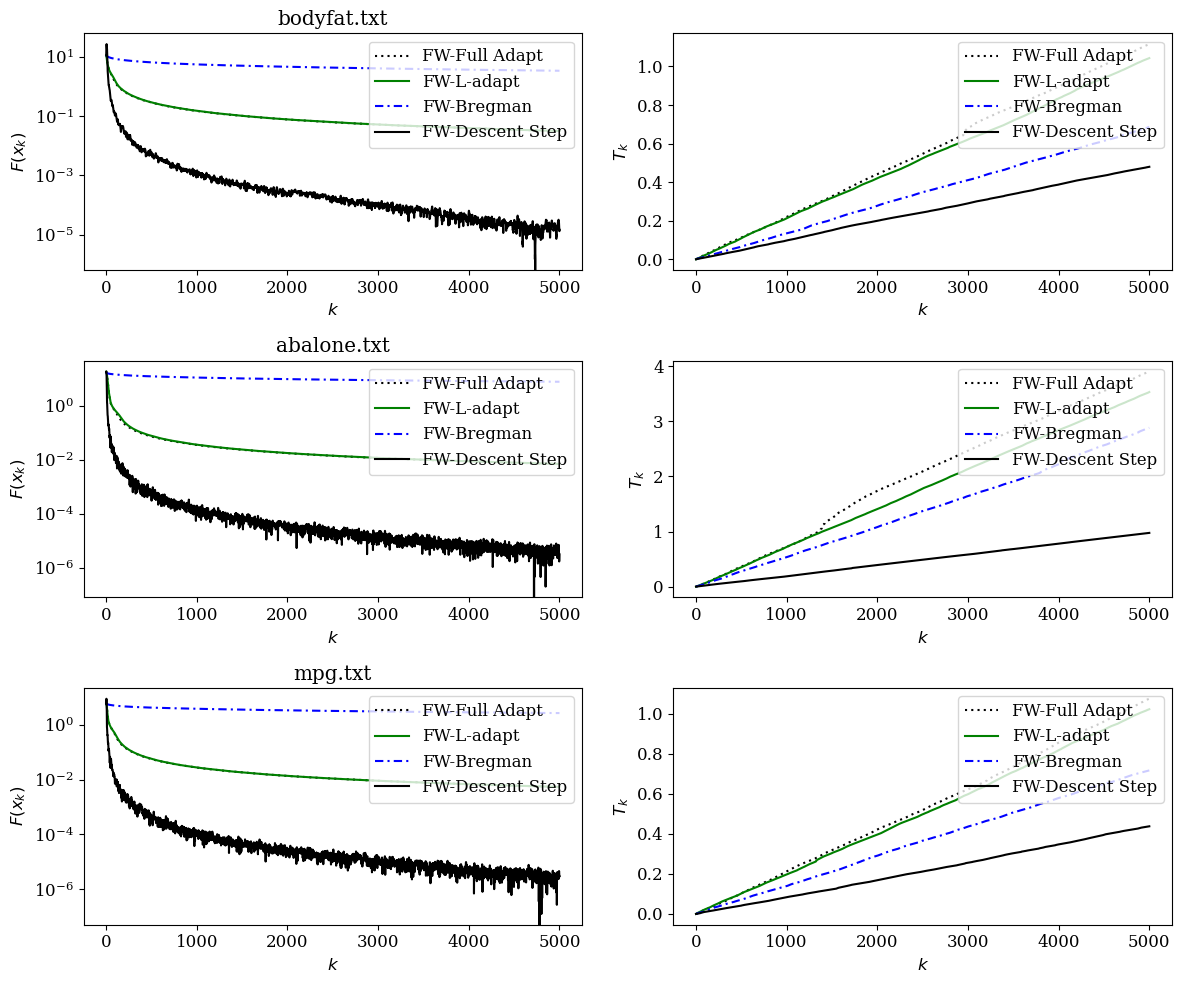

In [13]:
plt.rcParams.update({'font.size': 12, 'font.family': 'serif'})

np.random.seed(2025)
max_iters = 5000
verbskip = 500
ls_ratio = 2.0
theta = 1.05
gamma = 2.0

base_path = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))  # from ipynb to parameters_free_fw/
filenames = [
    os.path.join(base_path, "parameters_free_fw", "data", "bodyfat.txt"),
    os.path.join(base_path, "parameters_free_fw", "data", "abalone.txt"),
    os.path.join(base_path, "parameters_free_fw", "data", "mpg.txt"),
]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

labels = [r"FW-Full Adapt", r"FW-L-adapt", r"FW-Bregman", r"FW-Descent Step"]

for i, filename in enumerate(filenames):
    f, h, L, x0 = accbpg.D_opt_libsvm(filename)
    lmo = accbpg.lmo_simplex()

    _, F00_full_adapt, _, T_full_adapt, _ = accbpg.FW_alg_div_step_adapt(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        ls_ratio=ls_ratio, divisor_for_tse=theta, verbskip=verbskip
    )
    _, F00_L_adapt, _, T_adapt = accbpg.FW_alg_div_step(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        linesearch=True, ls_ratio=ls_ratio, verbskip=verbskip
    )
    _, F00_bregman, _, T_bregman = accbpg.FW_alg_div_step(
        f, h, L, x0, maxitrs=max_iters, gamma=gamma, lmo=lmo,
        linesearch=False, verbskip=verbskip
    )
    _, F00_descent_step, T_descent_step, _ = accbpg.FW_alg_descent_step(
        f, h, x0, maxitrs=max_iters, lmo=lmo, verbskip=verbskip
    )

    # Plot F(x_k)
    accbpg.plot_comparisons(
        axes[i, 0],
        [F00_full_adapt, F00_L_adapt, F00_bregman, F00_descent_step],
        labels,
        x_vals=[], plotdiff=True, yscale="log",
        xlabel=r"$k$", ylabel=r"$F(x_k)$",
        legendloc="upper right"
    )
    axes[i, 0].set_title(filenames[i].split("\\")[-1])

    # Plot T_k
    accbpg.plot_comparisons(
        axes[i, 1],
        [T_full_adapt, T_adapt, T_bregman, T_descent_step],
        labels,
        x_vals=[], plotdiff=True, yscale="linear",
        xlabel=r"$k$", ylabel=r"$T_k$",
        legendloc="upper right"
    )

plt.tight_layout()

## Выводы

1) FW-adapt-all (адаптивный по обоим параметрам) стабильно опережает FW-adapt-L (адаптивный только по L), но совсем не на много. Т.е. можно делать вывод, что адаптивность действительно дает ускорение, но это ускорение зависит от конкретного параметра, который регулируется. Существенный минус FW-adapt-full в том, что он потребил довольно много вычислительных ресурсов, т.к. ему приходилось долго уменьшать $\gamma$ до приемлемого значения. Возможно, данный минус можно убрать, если поставить начальгную $\gamma$ ниже.

2) На графиках видим, что FW-Descent Step существенно выигрывает все другие алгоритмы по скорости сходимости, по вычислительным ресурсам, так же он не требует занния параметров функции. Плюс ко всему мы в нашей работе доказали, что он с гарантией сходится к решению для относительно гладких функций.

3) Если мы меняем $\gamma$ и $L$ поочередно, то таким образом мы достигаем наибольшей производительности. Эксперименты особенно ярко это показали на параметрах функции $m=80, n=160$. На остальных выигрыш небольшой, но проигрыша никогда не было. Интересно, что если мы меняем $\gamma$ каждые 5, 10, 50 итераций, то это не влияет на производительность особо. Я предполагаю, что это из-за особенностей самой задачи.

В итоге мы видим, что алгоритмы, для которых не требуется знаний параметров ведут сходятся быстрее. Алгоритм с убывающим шагом вообще выигрывает абсолютно по всем параметрам в этом эксперименте.